In [3343]:
## Datascience related libraries
import numpy as np
import pandas as pd

In [3344]:
## Visualization related libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3345]:
#Model related Libaries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [3346]:
## General usage libraries
import math
from tabulate import tabulate

In [3347]:
## To avoid any deprecation related messages
import warnings
warnings.filterwarnings('ignore')

In [3348]:
## modifying pandas related visual settings
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1500)

## Reading and Understanding the Data

In [3349]:
# Reading the data from CSV file
rawdata = pd.read_csv("Leads.csv")

In [3350]:
# Displaying the first 5 records
rawdata.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3351]:
# check the rows and columns count
rawdata.shape

(9240, 37)

In [3352]:
# checking the columns dtype objects and not null count
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [3353]:
# check the statistics of dataset
rawdata.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [3354]:
#check for duplicates
sum(rawdata.duplicated(subset = ['Prospect ID','Lead Number'])) == 0

True

In [3355]:
# shorten column names
rawdata.rename(columns = {'I agree to pay the amount through cheque': 'Pay Cheque',
                          'Get updates on DM Content':'DM Content',
                          'Update me on Supply Chain Content':'SupplyChain Content',
                          'Receive More Updates About Our Courses':'Receive Updates',
                          'Through Recommendations':'Recommendations',
                          'A free copy of Mastering The Interview':'Mock Interview',
                          'Total Time Spent on Website':'Spent on Website',
                          'How did you hear about X Education':'Source',
                          'What is your current occupation':'Occupation',
                          'What matters most to you in choosing a course':'Reason',
                          'Last Notable Activity':'Notable Activity',
                          'Digital Advertisement':'Advertisement'
                         
                         }, inplace = True)

In [3356]:
## to check the Null values present in the each feature/column
rawdata_nullpercentage = round(rawdata.isnull().sum().sort_values() * 100 / rawdata.shape[0],2)
rawdata_nullpercentage

Prospect ID                     0.00
Pay Cheque                      0.00
DM Content                      0.00
SupplyChain Content             0.00
Receive Updates                 0.00
Recommendations                 0.00
Advertisement                   0.00
Newspaper                       0.00
X Education Forums              0.00
Mock Interview                  0.00
Magazine                        0.00
Search                          0.00
Newspaper Article               0.00
Notable Activity                0.00
Lead Number                     0.00
Lead Origin                     0.00
Spent on Website                0.00
Converted                       0.00
Do Not Call                     0.00
Do Not Email                    0.00
Lead Source                     0.39
Last Activity                   1.11
Page Views Per Visit            1.48
TotalVisits                     1.48
City                           15.37
Specialization                 15.56
Source                         23.89
C

In [3357]:
## the columns from raw data frame which have more than 40 % null values
rawdata_highnullCount = rawdata_nullpercentage[rawdata_nullpercentage > 40]
rawdata_highnullCount

Asymmetrique Activity Index    45.65
Asymmetrique Profile Index     45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Score     45.65
Lead Quality                   51.59
dtype: float64

In [3358]:
## Removing the columns from raw data frame which have more than 40 % null values
rawdata_lessnullCount = rawdata_nullpercentage[~(rawdata_nullpercentage > 40) ]
rawdata_lessnullCount

Prospect ID              0.00
Pay Cheque               0.00
DM Content               0.00
SupplyChain Content      0.00
Receive Updates          0.00
Recommendations          0.00
Advertisement            0.00
Newspaper                0.00
X Education Forums       0.00
Mock Interview           0.00
Magazine                 0.00
Search                   0.00
Newspaper Article        0.00
Notable Activity         0.00
Lead Number              0.00
Lead Origin              0.00
Spent on Website         0.00
Converted                0.00
Do Not Call              0.00
Do Not Email             0.00
Lead Source              0.39
Last Activity            1.11
Page Views Per Visit     1.48
TotalVisits              1.48
City                    15.37
Specialization          15.56
Source                  23.89
Country                 26.63
Occupation              29.11
Lead Profile            29.32
Reason                  29.32
Tags                    36.29
dtype: float64

In [3359]:
## Data frame with less null count columns 
data_leadscore = rawdata[rawdata_lessnullCount.index]
data_leadscore.head()

,Prospect ID,Pay Cheque,DM Content,SupplyChain Content,Receive Updates,Recommendations,Advertisement,Newspaper,X Education Forums,Mock Interview,Magazine,Search,Newspaper Article,Notable Activity,Lead Number,Lead Origin,Spent on Website,Converted,Do Not Call,Do Not Email,Lead Source,Last Activity,Page Views Per Visit,TotalVisits,City,Specialization,Source,Country,Occupation,Lead Profile,Reason,Tags
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,No,No,No,No,No,No,No,No,No,No,No,Modified,660737,API,0,0,No,No,Olark Chat,Page Visited on Website,0.0,0.0,Select,Select,Select,NaN,Unemployed,Select,Better Career Prospects,Interested in other courses
1,2a272436-5132-4136-86fa-dcc88c88f482,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened,660728,API,674,0,No,No,Organic Search,Email Opened,2.5,5.0,Select,Select,Select,India,Unemployed,Select,Better Career Prospects,Ringing
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,No,No,No,No,No,No,No,Yes,No,No,No,Email Opened,660727,Landing Page Submission,1532,1,No,No,Direct Traffic,Email Opened,2.0,2.0,Mumbai,Business Administration,Select,India,Student,Potential Lead,Better Career Prospects,Will revert after reading the email
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,No,No,No,No,No,No,No,No,No,No,No,Modified,660719,Landing Page Submission,305,0,No,No,Direct Traffic,Unreachable,1.0,1.0,Mumbai,Media and Advertising,Word Of Mouth,India,Unemployed,Select,Better Career Prospects,Ringing
4,3256f628-e534-4826-9d63-4a8b88782852,No,No,No,No,No,No,No,No,No,No,No,No,Modified,660681,Landing Page Submission,1428,1,No,No,Google,Converted to Lead,1.0,2.0,Mumbai,Select,Other,India,Unemployed,Select,Better Career Prospects,Will revert after reading the email


In [3360]:
## Total columns to handle
len(data_leadscore.columns)

32

In [3361]:
## Going Handle each every column for analysis
print(data_leadscore.columns)

Index(['Prospect ID', 'Pay Cheque', 'DM Content', 'SupplyChain Content', 'Receive Updates', 'Recommendations', 'Advertisement', 'Newspaper', 'X Education Forums', 'Mock Interview', 'Magazine', 'Search', 'Newspaper Article', 'Notable Activity', 'Lead Number', 'Lead Origin', 'Spent on Website', 'Converted', 'Do Not Call', 'Do Not Email', 'Lead Source', 'Last Activity', 'Page Views Per Visit', 'TotalVisits', 'City', 'Specialization', 'Source', 'Country', 'Occupation', 'Lead Profile', 'Reason', 'Tags'], dtype='object')


In [3362]:
## Dividing the data to numerical and categorical Features
CategoryFeatures = data_leadscore.select_dtypes(include=object)
NumericFeatures = data_leadscore.select_dtypes(exclude=object)

In [3363]:
CategoryFeatures.columns

Index(['Prospect ID', 'Pay Cheque', 'DM Content', 'SupplyChain Content', 'Receive Updates', 'Recommendations', 'Advertisement', 'Newspaper', 'X Education Forums', 'Mock Interview', 'Magazine', 'Search', 'Newspaper Article', 'Notable Activity', 'Lead Origin', 'Do Not Call', 'Do Not Email', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Source', 'Country', 'Occupation', 'Lead Profile', 'Reason', 'Tags'], dtype='object')

In [3364]:
## total Categorical columns to handle
len(CategoryFeatures.columns)

27

In [3365]:
NumericFeatures.columns

Index(['Lead Number', 'Spent on Website', 'Converted', 'Page Views Per Visit', 'TotalVisits'], dtype='object')

In [3366]:
## total Numeric columns to handle
len(NumericFeatures.columns)

5

##### Categorical Features handling

In [3367]:
CategoryFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Prospect ID          9240 non-null   object
 1   Pay Cheque           9240 non-null   object
 2   DM Content           9240 non-null   object
 3   SupplyChain Content  9240 non-null   object
 4   Receive Updates      9240 non-null   object
 5   Recommendations      9240 non-null   object
 6   Advertisement        9240 non-null   object
 7   Newspaper            9240 non-null   object
 8   X Education Forums   9240 non-null   object
 9   Mock Interview       9240 non-null   object
 10  Magazine             9240 non-null   object
 11  Search               9240 non-null   object
 12  Newspaper Article    9240 non-null   object
 13  Notable Activity     9240 non-null   object
 14  Lead Origin          9240 non-null   object
 15  Do Not Call          9240 non-null   object
 16  Do Not

In [3368]:
## Removing any trailing spaces from the category feature varibales
data_leadscore[CategoryFeatures.columns].apply(lambda x: x.str.strip()).head()

,Prospect ID,Pay Cheque,DM Content,SupplyChain Content,Receive Updates,Recommendations,Advertisement,Newspaper,X Education Forums,Mock Interview,Magazine,Search,Newspaper Article,Notable Activity,Lead Origin,Do Not Call,Do Not Email,Lead Source,Last Activity,City,Specialization,Source,Country,Occupation,Lead Profile,Reason,Tags
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,No,No,No,No,No,No,No,No,No,No,No,Modified,API,No,No,Olark Chat,Page Visited on Website,Select,Select,Select,NaN,Unemployed,Select,Better Career Prospects,Interested in other courses
1,2a272436-5132-4136-86fa-dcc88c88f482,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened,API,No,No,Organic Search,Email Opened,Select,Select,Select,India,Unemployed,Select,Better Career Prospects,Ringing
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,No,No,No,No,No,No,No,Yes,No,No,No,Email Opened,Landing Page Submission,No,No,Direct Traffic,Email Opened,Mumbai,Business Administration,Select,India,Student,Potential Lead,Better Career Prospects,Will revert after reading the email
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,No,No,No,No,No,No,No,No,No,No,No,Modified,Landing Page Submission,No,No,Direct Traffic,Unreachable,Mumbai,Media and Advertising,Word Of Mouth,India,Unemployed,Select,Better Career Prospects,Ringing
4,3256f628-e534-4826-9d63-4a8b88782852,No,No,No,No,No,No,No,No,No,No,No,No,Modified,Landing Page Submission,No,No,Google,Converted to Lead,Mumbai,Select,Other,India,Unemployed,Select,Better Career Prospects,Will revert after reading the email


In [3369]:
# removing unique id column
data_leadscore.drop('Prospect ID', axis = 1, inplace = True)
CategoryFeatures.drop('Prospect ID', axis = 1, inplace = True)

In [3370]:
## tabular formt to display all required Feature analysing Nulls, Percentage of categories
CategoryStat =[]
df = CategoryFeatures
for col in df.columns.sort_values():
    n = df[col].nunique()
    u = df[col].sort_values().unique()
    vc = df[col].value_counts()
    p = df[col].value_counts(normalize=True)*100
    d = df[col].describe()
    nu = df[col].isnull().sum()
    for co in range(0,n):
        uValue = "".join([f"{co+1}.{u[co]:<20}  -> {vc[u[co]]:<10} ( {round(p[u[co]],3)} %) \n" for co in range(0,n)])
    CategoryStat.append([col[:10],uValue,nu,d['count']])
print(tabulate(CategoryStat,headers=["Feature","Category -> Category Count-> Perc","Nulls","Total Count"],tablefmt="grid"))

+------------+---------------------------------------------------------------------------------+---------+---------------+
| Feature    | Category -> Category Count-> Perc                                               |   Nulls |   Total Count |
+============+=================================================================================+=========+===============+
| Advertisem | 1.No                    -> 9236       ( 99.957 %)                               |       0 |          9240 |
|            | 2.Yes                   -> 4          ( 0.043 %)                                |         |               |
+------------+---------------------------------------------------------------------------------+---------+---------------+
| City       | 1.Mumbai                -> 3222       ( 41.202 %)                               |    1420 |          7820 |
|            | 2.Other Cities          -> 686        ( 8.772 %)                                |         |               |
|            | 3

In [3371]:
# removing un balanced value columns
columns_to_drop = ['Advertisement',
                   'DM Content','Do Not Call',
                   'Lead Profile','Magazine', 'Newspaper','Newspaper Article', 
                   'Pay Cheque','Receive Updates','Reason', 'Recommendations', 
                   'Search', 'Source','SupplyChain Content',
                   'Tags','X Education Forums' ]

data_leadscore.drop(columns_to_drop, axis = 1, inplace = True)
CategoryFeatures.drop(columns_to_drop, axis = 1, inplace = True)

In [3372]:
# Calculate percentage of null values for each column
round((CategoryFeatures.isnull().sum() / data_leadscore.shape[0]) * 100,2)

Mock Interview       0.00
Notable Activity     0.00
Lead Origin          0.00
Do Not Email         0.00
Lead Source          0.39
Last Activity        1.11
City                15.37
Specialization      15.56
Country             26.63
Occupation          29.11
dtype: float64

In [3373]:
# Method to create Count plots
def Countplots(df,Columns,fsize,rot):
    fig = plt.figure(figsize= (fsize))
    cols = 2
    rows = math.ceil(len(Columns)/cols)
    for i, col in enumerate(Columns):
        ax=fig.add_subplot(rows, cols, i+1)
        total = len(df)
        sns.countplot(data=df,y= df[col], ax=ax)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() 
            y = p.get_y() + p.get_height() / 2 - 0.05
            ax.annotate(percentage, (x, y), fontsize = 20) 
        plt.xticks(rotation=rot,fontsize=20)
        plt.xlabel('')
        plt.ylabel('')
        plt.yticks(fontsize=20)
        plt.title(col,fontsize=30)
    fig.tight_layout()  
plt.show()

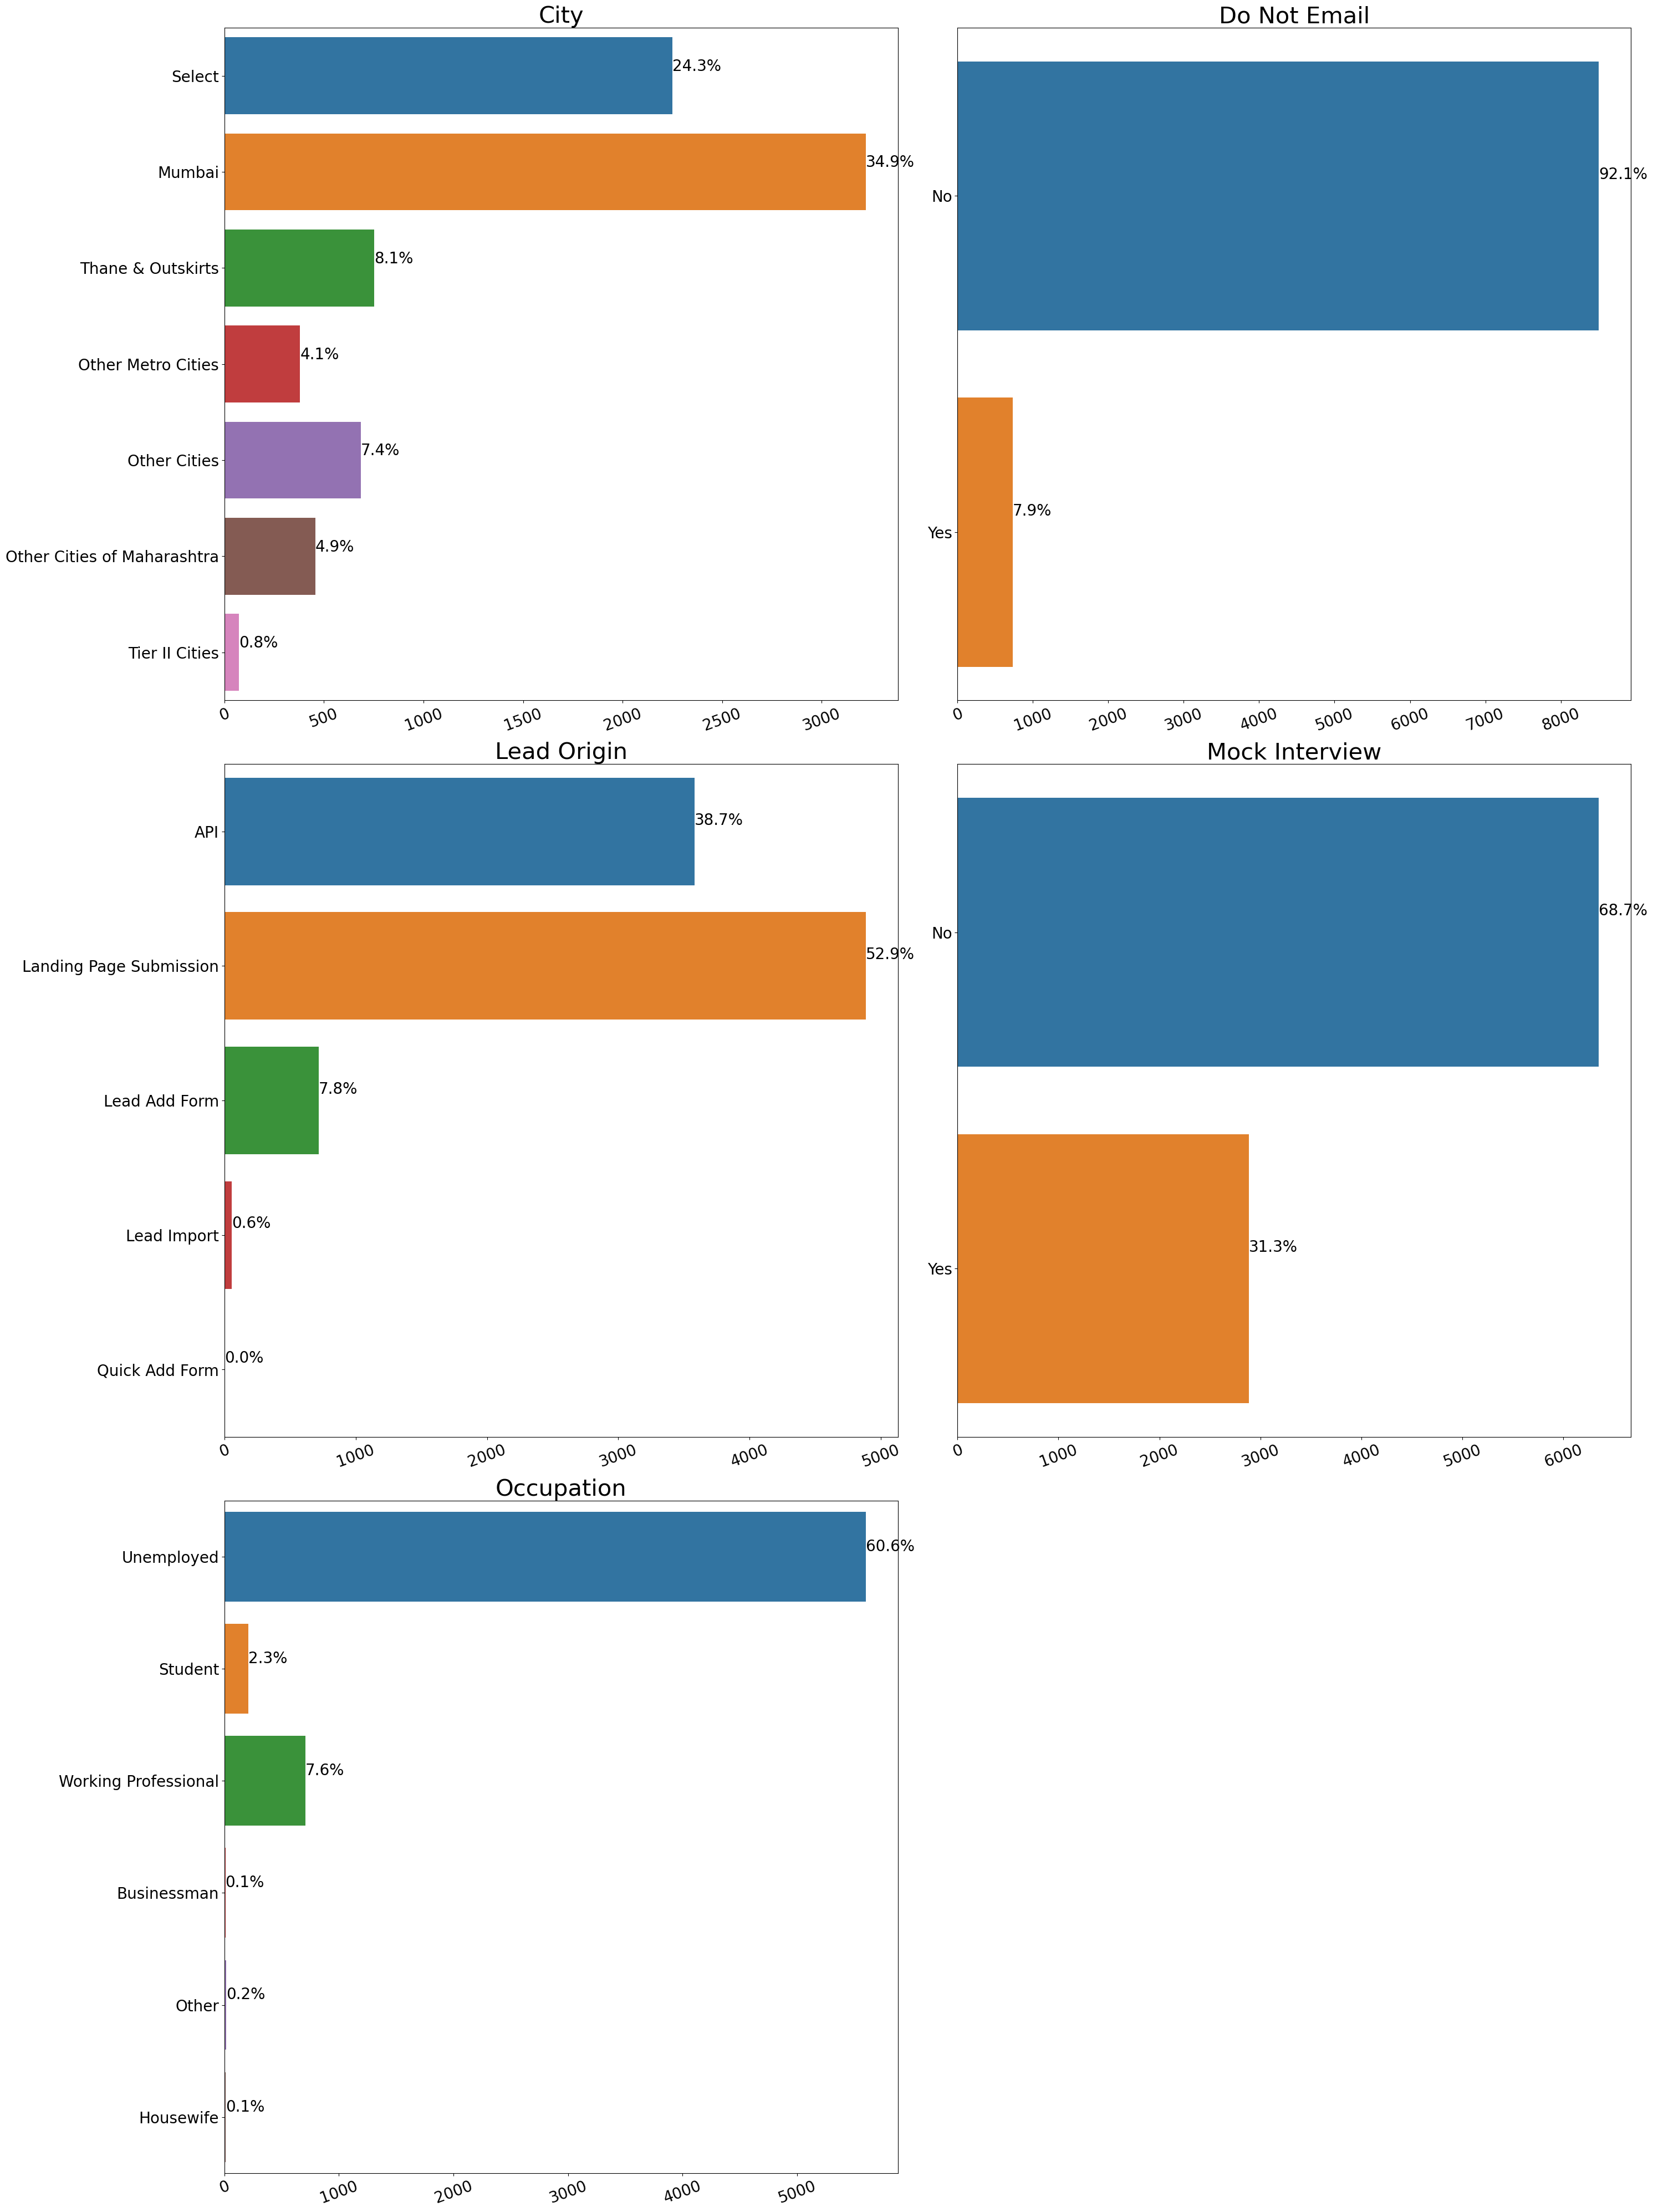

In [3374]:
## How each category distribted acrros data frame
Countplots(CategoryFeatures,CategoryFeatures.columns[CategoryFeatures.nunique() <= 15].sort_values(),(30,40),20)

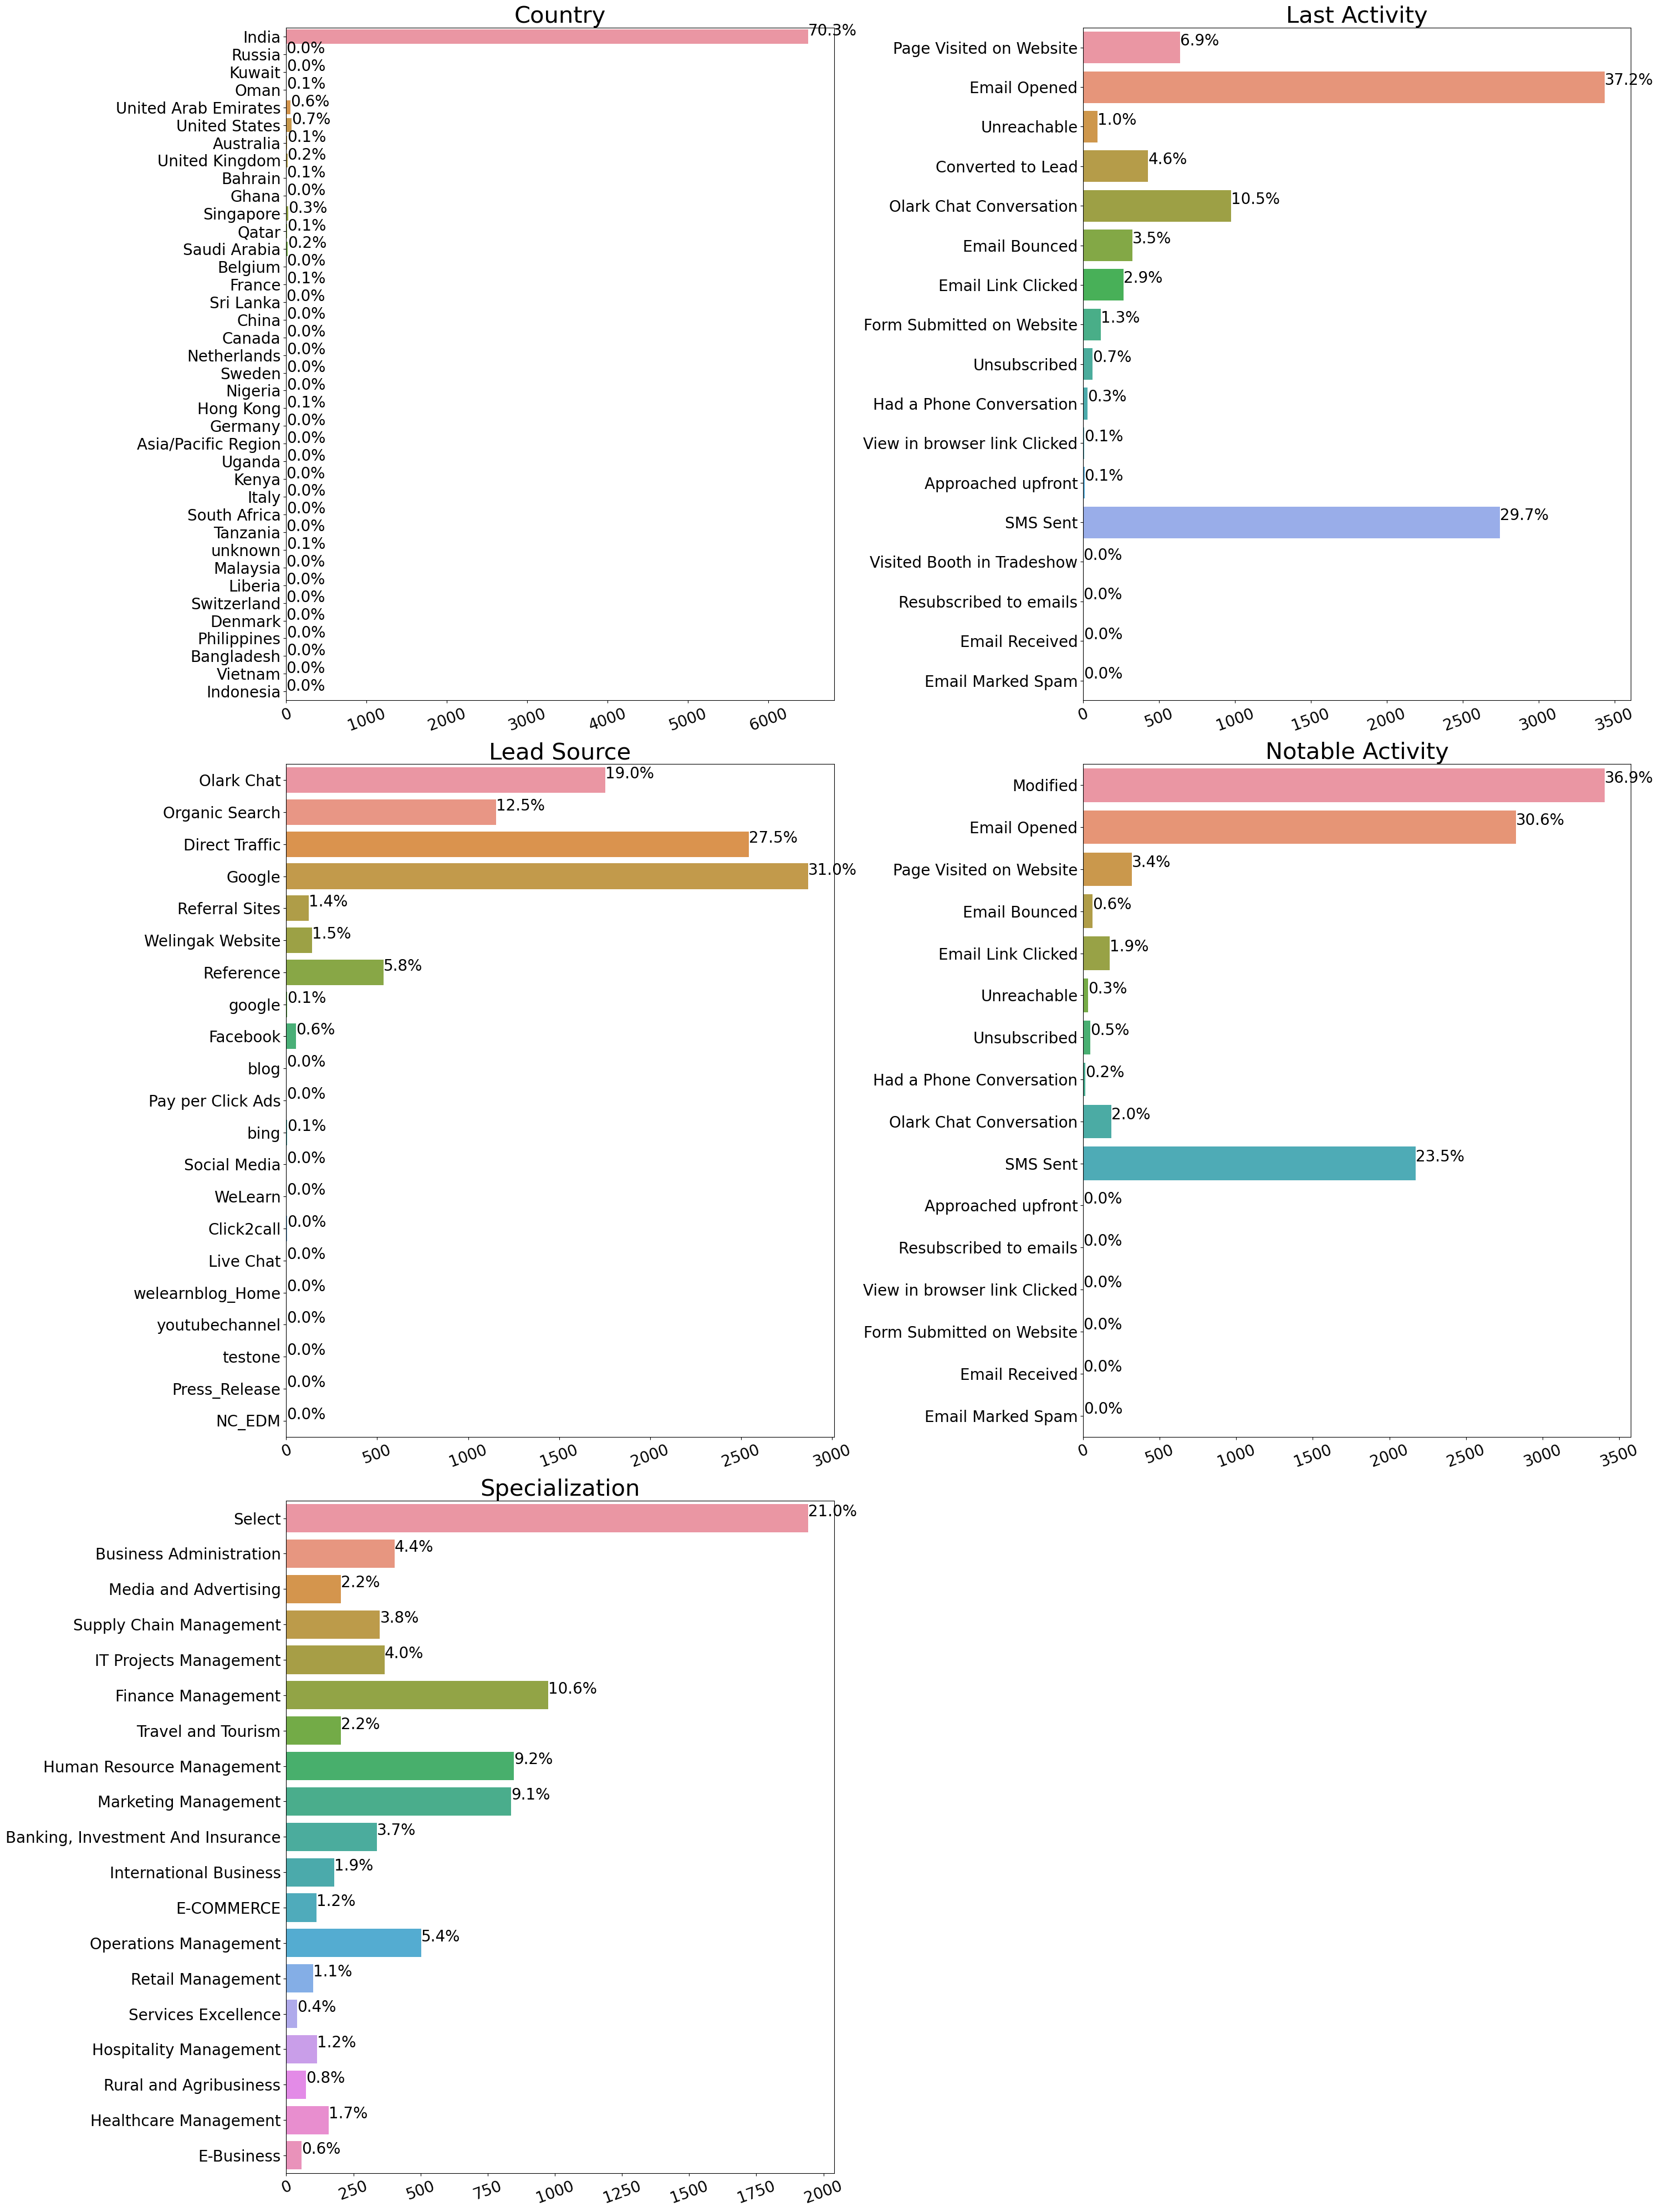

In [3375]:
## How each category distribted acrros data frame
Countplots(CategoryFeatures,CategoryFeatures.columns[CategoryFeatures.nunique() > 15].sort_values(),(30,40),20)

In [3376]:
# checking category variables present 
CategoryFeatures.columns

Index(['Mock Interview', 'Notable Activity', 'Lead Origin', 'Do Not Email', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Country', 'Occupation'], dtype='object')

In [3377]:
#checking value counts
data_leadscore['Country'].value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [3378]:
# The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column
data_leadscore.drop('Country', axis = 1, inplace = True)
CategoryFeatures.drop('Country', axis = 1, inplace = True)

In [3379]:
#checking value counts
data_leadscore['City'].value_counts(normalize = True, dropna = False) * 100

Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [3380]:
# Handling Specialization column
data_leadscore['City'] = data_leadscore['City'].replace('Select','Mumbai')
data_leadscore['City'] = data_leadscore['City'].replace(np.nan,'Mumbai')

# categorize all non-mumbai, but Maharashtra cities
data_leadscore.loc[(data_leadscore.City == 'Thane & Outskirts') | 
                    (data_leadscore.City == 'Other Cities of Maharashtra'), 
                    'City'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
data_leadscore.loc[(data_leadscore.City == 'Other Cities') | 
                    (data_leadscore.City == 'Other Metro Cities') |
                    (data_leadscore.City == 'Tier II Cities') , 
                    'City'] = 'Non-Maharashtra Cities'

data_leadscore['City'].value_counts(normalize = True, dropna = False) * 100

Mumbai                           74.577922
Non-Mumbai Maharashtra Cities    13.084416
Non-Maharashtra Cities           12.337662
Name: City, dtype: float64

In [3381]:
#checking value counts
data_leadscore['Specialization'].value_counts(normalize = True, dropna = False) * 100

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [3382]:
# Handling Specialization column
data_leadscore['Specialization'] = data_leadscore['Specialization'].replace(np.nan,'Management Specializations',)

# categorize all management courses
data_leadscore.loc[(data_leadscore.Specialization == 'Finance Management') | 
                   (data_leadscore.Specialization == 'Human Resource Management') | 
                   (data_leadscore.Specialization == 'Marketing Management') |  
                   (data_leadscore.Specialization == 'Operations Management') |
                   (data_leadscore.Specialization == 'IT Projects Management') | 
                   (data_leadscore.Specialization == 'Supply Chain Management') |
                   (data_leadscore.Specialization == 'Healthcare Management') | 
                   (data_leadscore.Specialization == 'Hospitality Management') |
                   (data_leadscore.Specialization == 'Retail Management')|
                    (data_leadscore.Specialization == 'Select'),'Specialization'] = 'Management Specializations'

# categorize all busines courses
data_leadscore.loc[(data_leadscore.Specialization == 'Business Administration') | 
                   (data_leadscore.Specialization == 'International Business') | 
                   (data_leadscore.Specialization == 'Rural and Agribusiness') | 
                   (data_leadscore.Specialization == 'E-Business'), 'Specialization'] = 'Business Specializations'

# categorize all industry courses
data_leadscore.loc[(data_leadscore.Specialization == 'Banking, Investment And Insurance') |
                   (data_leadscore.Specialization == 'Media and Advertising') |
                   (data_leadscore.Specialization == 'Travel and Tourism') | 
                   (data_leadscore.Specialization == 'Services Excellence') |
                   (data_leadscore.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

data_leadscore.Specialization.value_counts(normalize = True, dropna = False) * 100

Management Specializations    82.608225
Industry Specializations       9.696970
Business Specializations       7.694805
Name: Specialization, dtype: float64

In [3383]:
#checking value counts
data_leadscore['Occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

In [3384]:
# replacing null values with unemployed
data_leadscore['Occupation'] = data_leadscore['Occupation'].replace(np.nan, 'Unemployed')
# combine low representing categories
data_leadscore.loc[(data_leadscore['Occupation'] == 'Student') | 
            (data_leadscore['Occupation'] == 'Other') |
            (data_leadscore['Occupation'] == 'Housewife') | 
            (data_leadscore['Occupation'] == 'Businessman') , 
            'Occupation'] = 'Student and Others'

data_leadscore['Occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              89.718615
Working Professional     7.640693
Student and Others       2.640693
Name: Occupation, dtype: float64

In [3385]:
# checking the null percentage on category features
round(100*(CategoryFeatures.isnull().sum()/len(CategoryFeatures.index)), 2)

Mock Interview       0.00
Notable Activity     0.00
Lead Origin          0.00
Do Not Email         0.00
Lead Source          0.39
Last Activity        1.11
City                15.37
Specialization      15.56
Occupation          29.11
dtype: float64

In [3386]:
#checking value counts
data_leadscore['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [3387]:
# handling Null valeues
data_leadscore.fillna(data_leadscore['Lead Source'].mode()[0], inplace=True)
data_leadscore['Lead Source'] = data_leadscore['Lead Source'].replace('google','Google')

#There are a lot of smaller values which will not be used as definitive factors, lets group them together
data_leadscore['Lead Source'] = data_leadscore['Lead Source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')
data_leadscore['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google                31.482684
Direct Traffic        27.521645
Olark Chat            18.993506
Organic Search        12.489177
Reference              5.779221
Other Social Sites     3.733766
Name: Lead Source, dtype: float64

In [3388]:
#checking value counts
data_leadscore['Lead Origin'].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [3389]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
data_leadscore.loc[(data_leadscore['Lead Origin'] == 'Lead Import') |
       (data_leadscore['Lead Origin'] == 'Quick Add Form') | 
       (data_leadscore['Lead Origin'] == 'Lead Add Form')
       , 'Lead Origin'] = 'Lead Add Form and Others'
data_leadscore['Lead Origin'].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission     52.878788
API                         38.744589
Lead Add Form and Others     8.376623
Name: Lead Origin, dtype: float64

In [3390]:
#checking value counts
data_leadscore['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Google                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [3391]:
#replacing Nan Values and combining low frequency values
data_leadscore['Last Activity'] = data_leadscore['Last Activity'].replace(np.nan,'Others')
data_leadscore['Last Activity'] = data_leadscore['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')
data_leadscore['Last Activity'].value_counts(normalize = True, dropna = False) * 100

Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Google                        1.114719
Name: Last Activity, dtype: float64

In [3392]:
#checking value counts
data_leadscore['Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Notable Activity, dtype: int64

In [3393]:
data_leadscore['Notable Activity'] = data_leadscore['Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')
data_leadscore['Notable Activity'].value_counts(normalize = True, dropna = False) * 100

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Other_Notable_activity      1.731602
Name: Notable Activity, dtype: float64

In [3394]:
#Check the Null Values in All Columns:
round(100*(CategoryFeatures.isnull().sum()/len(CategoryFeatures.index)), 2)

Mock Interview       0.00
Notable Activity     0.00
Lead Origin          0.00
Do Not Email         0.00
Lead Source          0.39
Last Activity        1.11
City                15.37
Specialization      15.56
Occupation          29.11
dtype: float64

In [3395]:
# determine unique values for all object datatype columns
for k, v in data_leadscore.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Mock Interview = 2
Notable Activity = 7
Lead Origin = 3
Do Not Email = 2
Lead Source = 6
Last Activity = 10
Page Views Per Visit = 115
TotalVisits = 42
City = 3
Specialization = 3
Occupation = 3


In [3396]:
## Common method plot count plots
def UniCountPlots(xlab,huelab,df):
    plt.figure(figsize=(10,5))
    total = len(df)
    ax = sns.countplot(x=xlab, hue=huelab, data=df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), fontsize = 20) 
    plt.show()

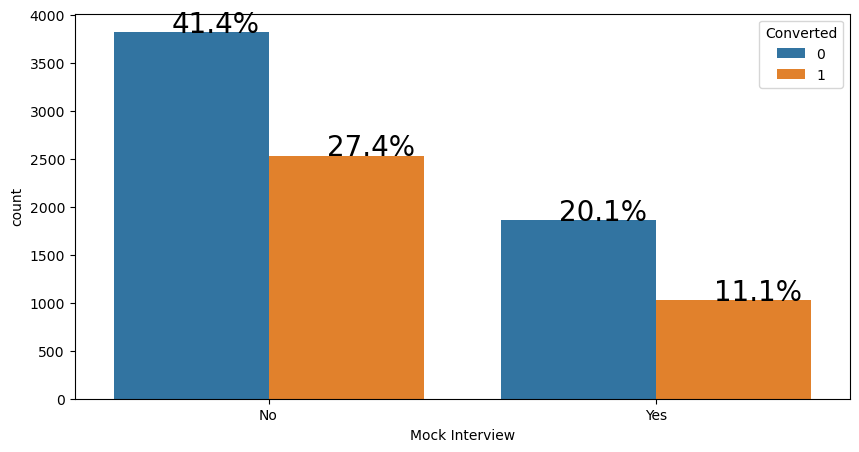

In [3397]:
## Mock Interview yes vs No
UniCountPlots('Mock Interview','Converted',data_leadscore)

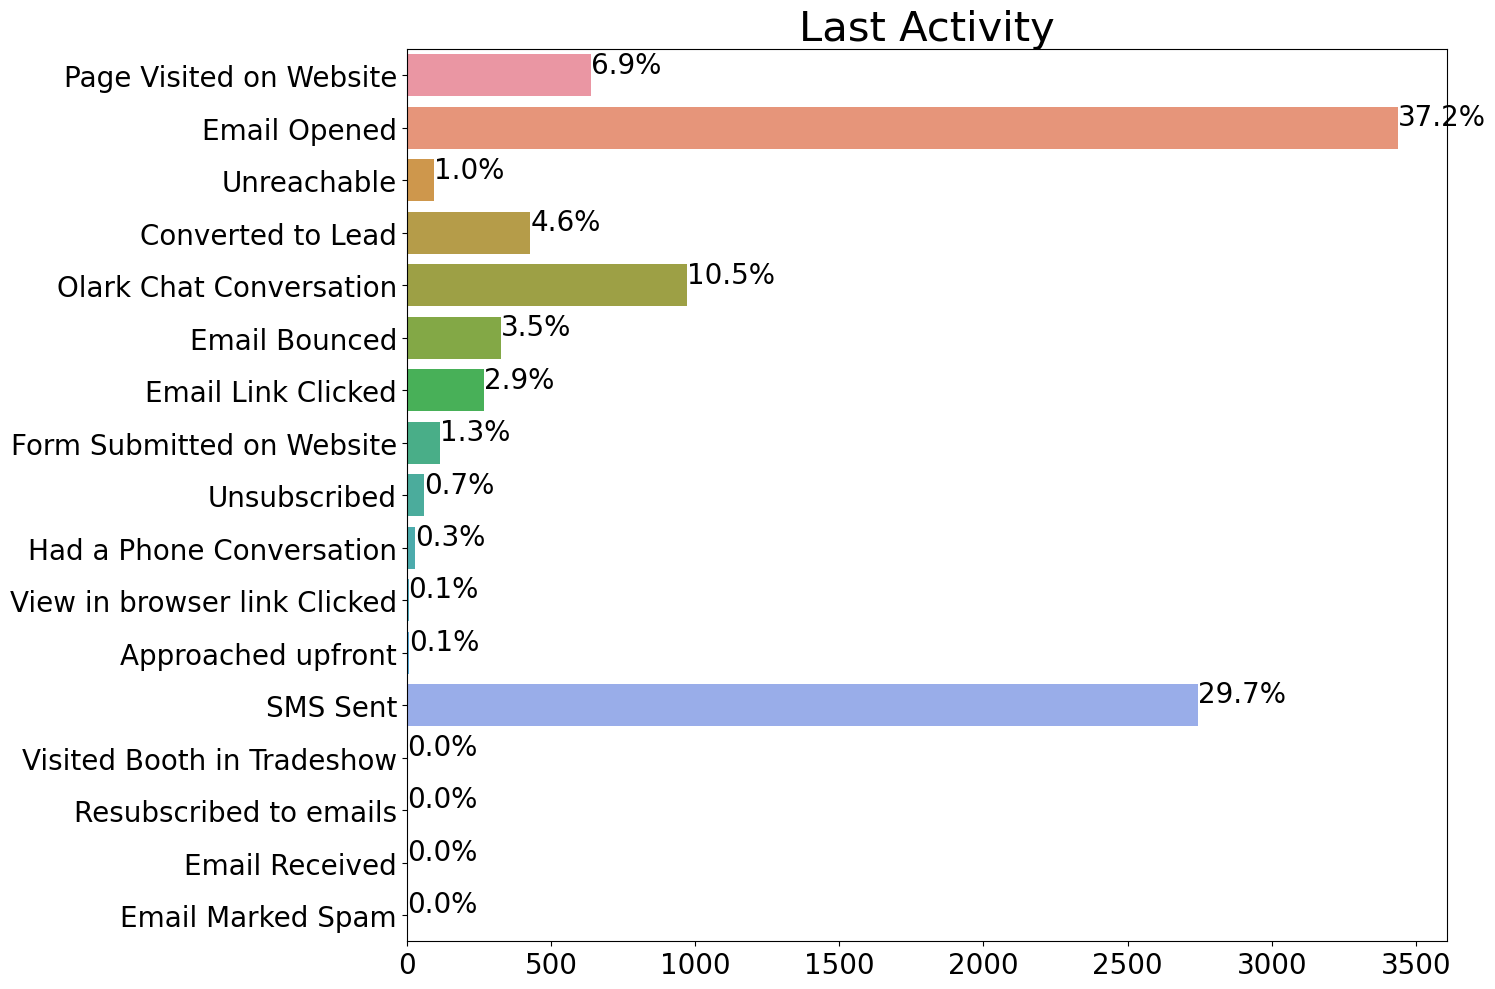

In [3398]:
## Last Activity
fig = plt.figure(figsize= (15,10))

for i, col in enumerate(['Last Activity']):
    ax=fig.add_subplot(1, 1, i+1)
    total = len(df)
    sns.countplot(data=CategoryFeatures,y= CategoryFeatures[col], ax=ax)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height() / 2 - 0.05
        ax.annotate(percentage, (x, y), fontsize = 20) 
    plt.xticks(rotation=0,fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=20)
    plt.title(col,fontsize=30)
fig.tight_layout()  
plt.show()

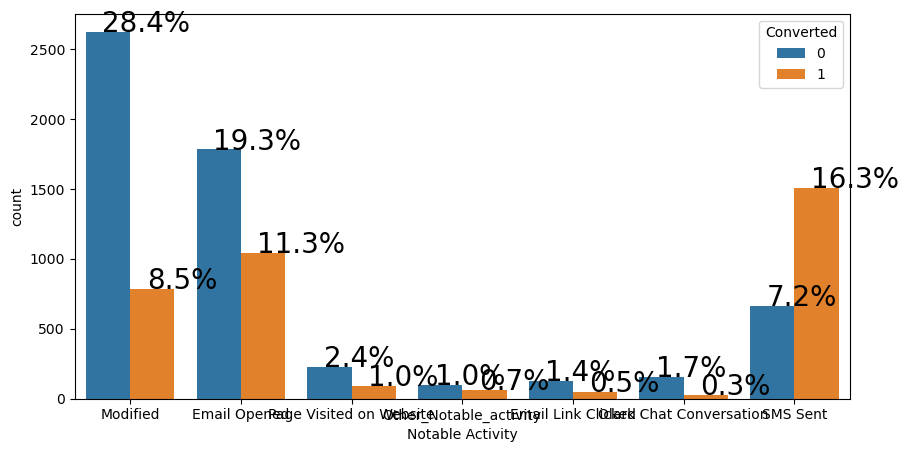

In [3399]:
## Notable Activity 
UniCountPlots('Notable Activity','Converted',data_leadscore)

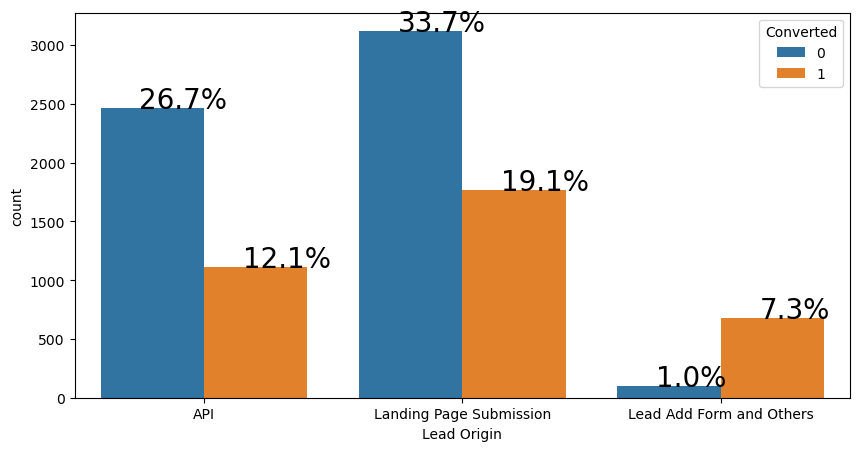

In [3400]:
## Lead Origin 
UniCountPlots('Lead Origin','Converted',data_leadscore)

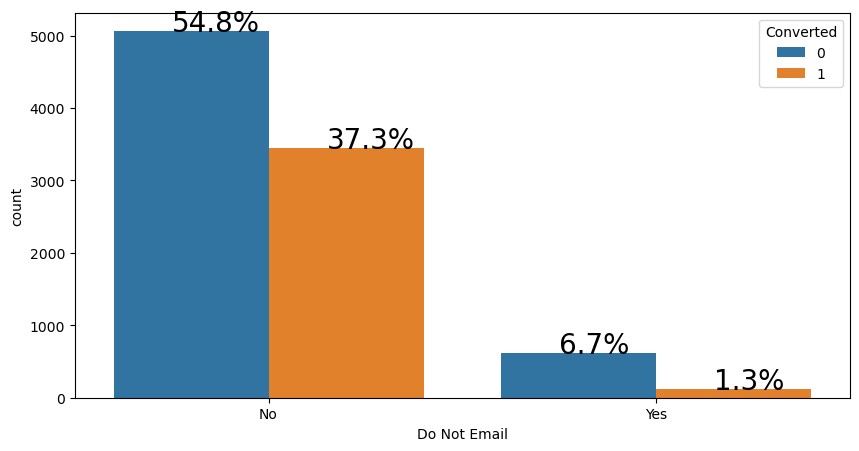

In [3401]:
## Do Not Email 
UniCountPlots('Do Not Email','Converted',data_leadscore)

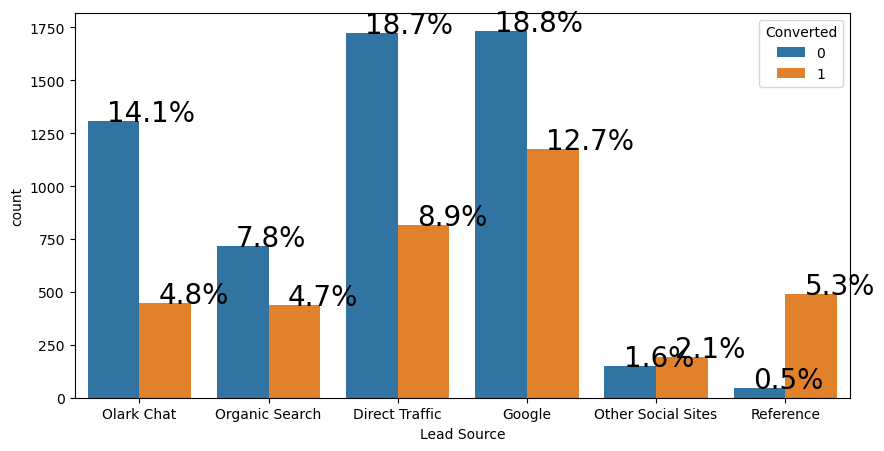

In [3402]:
## Lead Source 
UniCountPlots('Lead Source','Converted',data_leadscore)

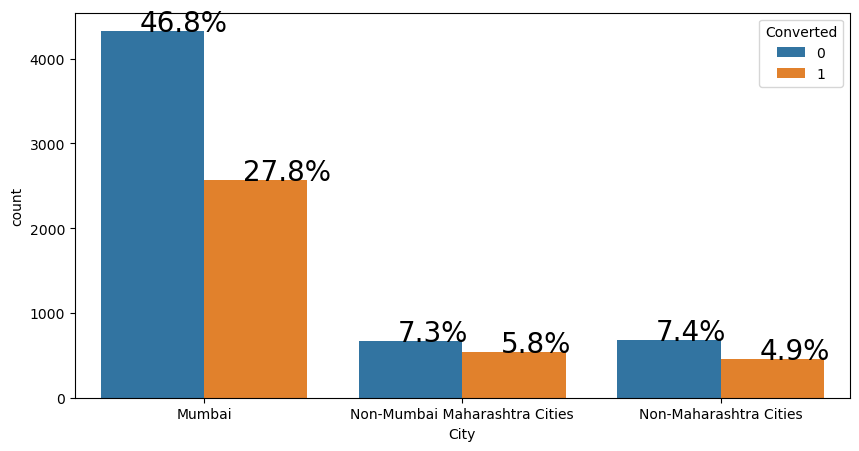

In [3403]:
## City
UniCountPlots('City','Converted',data_leadscore)

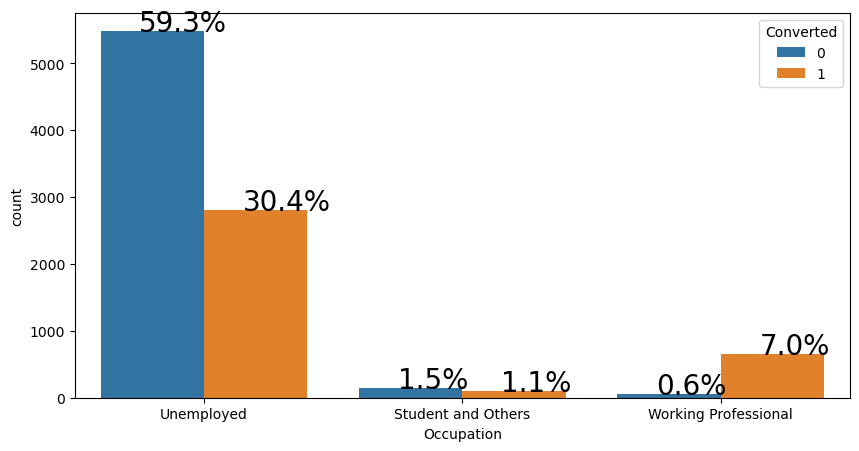

In [3404]:
## Occupation
UniCountPlots('Occupation','Converted',data_leadscore)

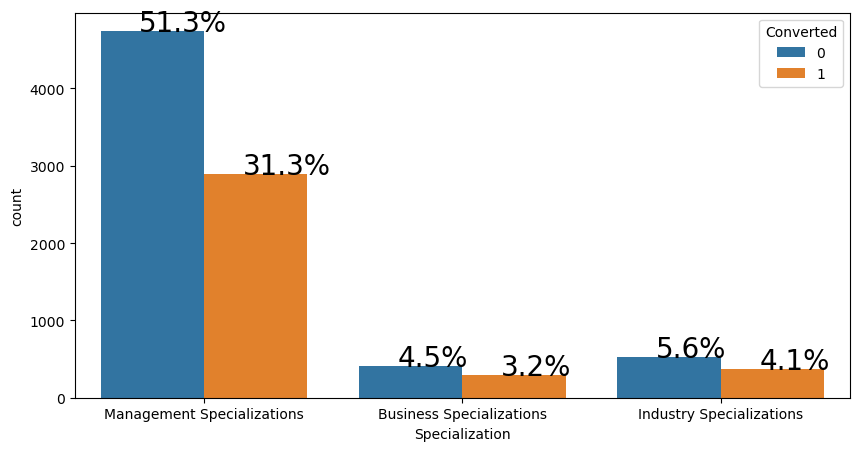

In [3405]:
## Occupation
UniCountPlots('Specialization','Converted',data_leadscore)

## Handling Numeric Fileds

In [3406]:
# Numerical value Columns check
NumericFeatures.columns

Index(['Lead Number', 'Spent on Website', 'Converted', 'Page Views Per Visit', 'TotalVisits'], dtype='object')

In [3407]:
#checking value counts
data_leadscore['TotalVisits'].value_counts()

0.0       2189
2.0       1680
3.0       1306
4.0       1120
5.0        783
6.0        466
1.0        395
7.0        309
8.0        224
9.0        164
Google     137
10.0       114
11.0        86
13.0        48
12.0        45
14.0        36
16.0        21
15.0        18
17.0        16
18.0        15
20.0        12
19.0         9
21.0         6
23.0         6
24.0         5
25.0         5
27.0         5
22.0         3
29.0         2
28.0         2
26.0         2
141.0        1
55.0         1
30.0         1
43.0         1
74.0         1
41.0         1
54.0         1
115.0        1
251.0        1
32.0         1
42.0         1
Name: TotalVisits, dtype: int64

In [3408]:
# treating Non numeric values
data_leadscore['TotalVisits'] = data_leadscore['TotalVisits'].replace('Google','9.0')
data_leadscore['TotalVisits'] = data_leadscore['TotalVisits'].astype('float')

In [3409]:
#checking value counts
data_leadscore['Page Views Per Visit'].value_counts()

0.0       2189
2.0       1795
3.0       1196
4.0        896
1.0        651
5.0        517
1.5        306
6.0        244
2.5        241
Google     137
7.0        133
3.5         94
8.0         86
1.33        66
1.67        60
2.33        59
2.67        54
9.0         45
4.5         43
1.75        28
3.33        27
10.0        25
1.25        23
5.5         21
2.25        19
11.0        18
3.67        16
6.5         13
1.8         13
2.75        12
1.4         11
4.33         9
14.0         9
2.8          9
2.2          9
1.6          8
2.17         8
3.25         8
2.4          6
13.0         6
1.2          5
12.0         5
1.43         4
3.4          4
2.6          4
1.71         4
1.83         4
15.0         4
1.38         3
4.25         3
4.75         3
1.57         3
16.0         3
5.67         3
1.78         3
1.56         2
5.4          2
2.71         2
2.83         2
1.23         2
1.22         2
3.6          2
3.75         2
7.5          2
1.14         2
2.22         2
5.25      

In [3410]:
# handling Non numeric values

data_leadscore['Page Views Per Visit'] = data_leadscore['Page Views Per Visit'].replace('Google','5.0')
data_leadscore['Page Views Per Visit']  = data_leadscore['Page Views Per Visit'].astype('float')

In [3411]:
#Check the % of Data that has Converted Values = 1:
Converted = (sum(data_leadscore['Converted'])/len(data_leadscore['Converted'].index))*100
Converted

38.53896103896104

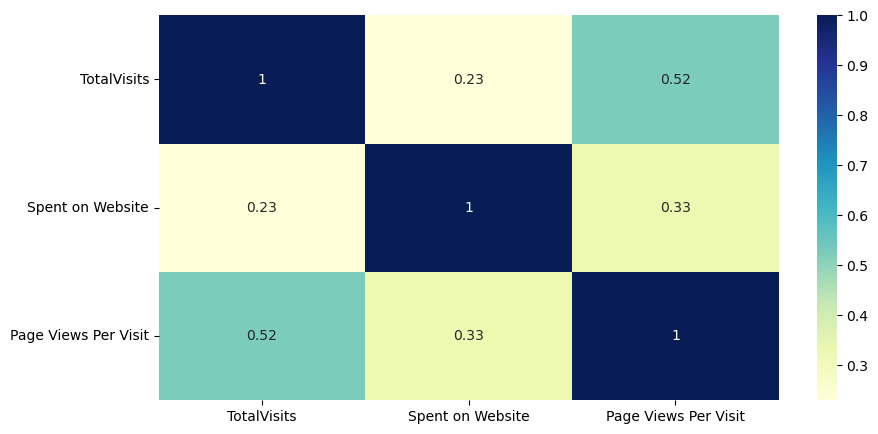

In [3412]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(data_leadscore[['TotalVisits', 'Spent on Website', 'Page Views Per Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Outliers Handling

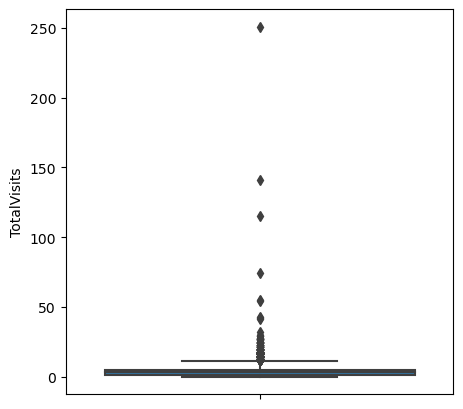

In [3413]:
# Box plot to identify Outliers
plt.figure(figsize = (5,5))
sns.boxplot(y=data_leadscore['TotalVisits'])
plt.show()

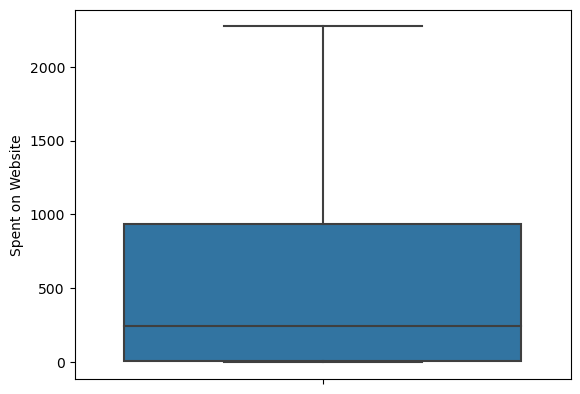

In [3414]:
# Box plot to identify Outliers
sns.boxplot(y=data_leadscore['Spent on Website'])
plt.show()

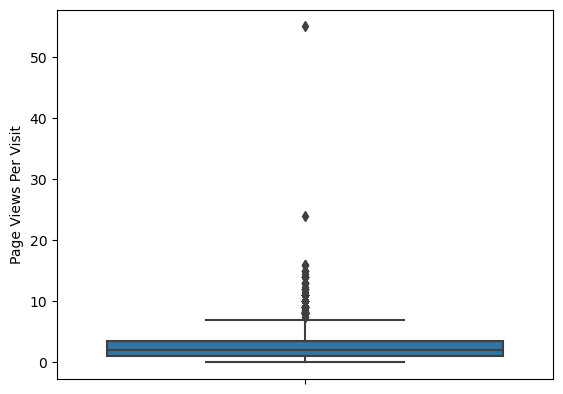

In [3415]:
# Box plot to identify Outliers
sns.boxplot(y=data_leadscore['Page Views Per Visit'])
plt.show()

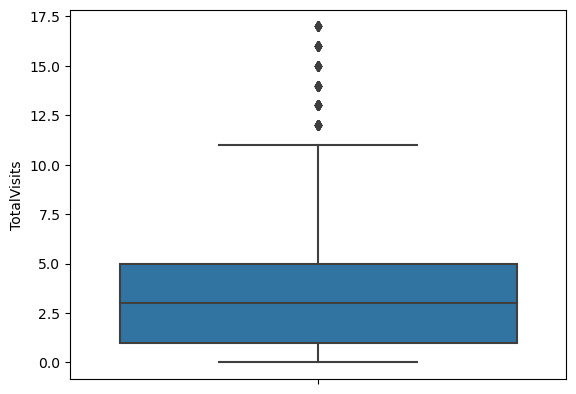

In [3416]:
# Treating Outliers
Q3 = data_leadscore['TotalVisits'].quantile(0.99)
data_leadscore = data_leadscore[data_leadscore['TotalVisits'] <= Q3]
Q1 = data_leadscore['TotalVisits'].quantile(0.01)
data_leadscore = data_leadscore[data_leadscore['TotalVisits'] >= Q1]
sns.boxplot(y=data_leadscore['TotalVisits'])
plt.show()

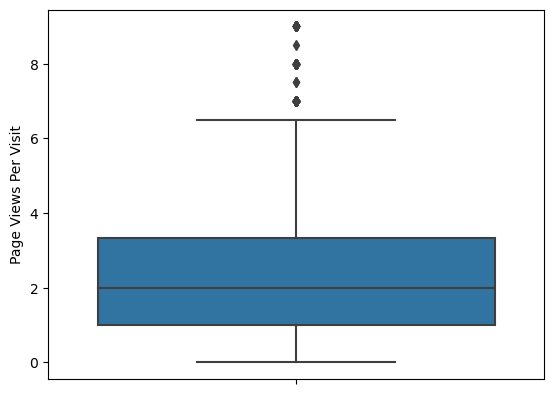

In [3417]:
# Treating Outliers
Q3 = data_leadscore['Page Views Per Visit'].quantile(0.99)
data_leadscore = data_leadscore[data_leadscore['Page Views Per Visit'] <= Q3]
Q1 = data_leadscore['Page Views Per Visit'].quantile(0.01)
data_leadscore = data_leadscore[data_leadscore['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data_leadscore['Page Views Per Visit'])
plt.show()

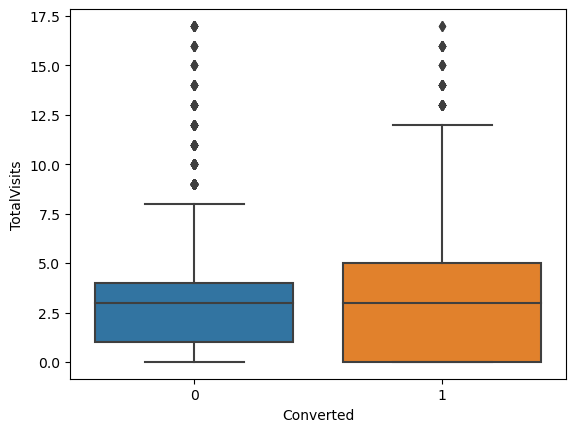

In [3418]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data_leadscore)
plt.show()

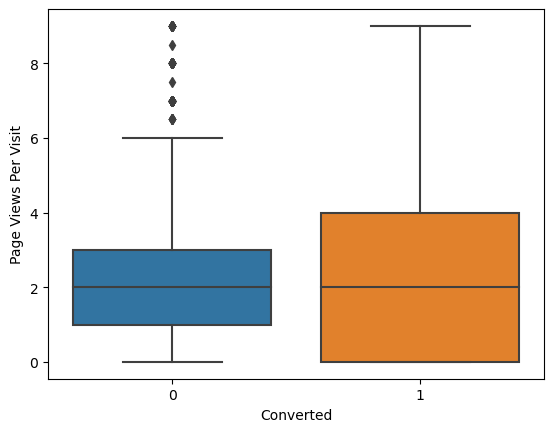

In [3419]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data_leadscore)
plt.show()

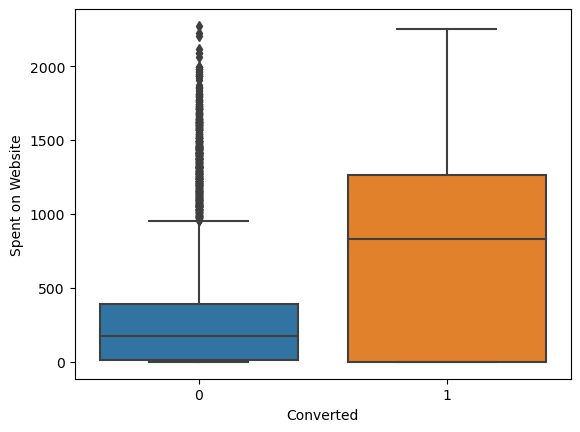

In [3420]:
#checking Spread of "Spent on Website" vs Converted variable
sns.boxplot(y = 'Spent on Website', x = 'Converted', data = data_leadscore)
plt.show()

###### Dummy Variables creation

In [3421]:
# determine unique values
for k, v in data_leadscore.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Mock Interview = 2
Notable Activity = 7
Lead Origin = 3
Do Not Email = 2
Lead Source = 6
Last Activity = 10
City = 3
Specialization = 3
Occupation = 3


In [3422]:
# Binary values converstion
binlist = ['Mock Interview', 'Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data_leadscore[binlist] = data_leadscore[binlist].apply(binary_map)

# check the operation was success
data_leadscore.head()

,Mock Interview,Notable Activity,Lead Number,Lead Origin,Spent on Website,Converted,Do Not Email,Lead Source,Last Activity,Page Views Per Visit,TotalVisits,City,Specialization,Occupation
0,0,Modified,660737,API,0,0,0,Olark Chat,Page Visited on Website,0.0,0.0,Mumbai,Management Specializations,Unemployed
1,0,Email Opened,660728,API,674,0,0,Organic Search,Email Opened,2.5,5.0,Mumbai,Management Specializations,Unemployed
2,1,Email Opened,660727,Landing Page Submission,1532,1,0,Direct Traffic,Email Opened,2.0,2.0,Mumbai,Business Specializations,Student and Others
3,0,Modified,660719,Landing Page Submission,305,0,0,Direct Traffic,Others,1.0,1.0,Mumbai,Industry Specializations,Unemployed
4,0,Modified,660681,Landing Page Submission,1428,1,0,Google,Converted to Lead,1.0,2.0,Mumbai,Management Specializations,Unemployed


In [3423]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data_leadscore[['Lead Origin', 'Lead Source', 'Specialization', 'Occupation', 'City','Notable Activity','Last Activity']], drop_first = True)

# Adding the results to the master dataframe
data_leadscore = pd.concat([data_leadscore, dummy1], axis=1)

In [3424]:
# Dropping the columns for which dummies have been created
data_leadscore.drop(['Lead Origin', 'Lead Source', 'Specialization', 'Occupation', 'City','Notable Activity','Last Activity'], axis = 1, inplace = True)
data_leadscore.head()

,Mock Interview,Lead Number,Spent on Website,Converted,Do Not Email,Page Views Per Visit,TotalVisits,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Specialization_Industry Specializations,Specialization_Management Specializations,Occupation_Unemployed,Occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Notable Activity_Email Opened,Notable Activity_Modified,Notable Activity_Olark Chat Conversation,Notable Activity_Other_Notable_activity,Notable Activity_Page Visited on Website,Notable Activity_SMS Sent,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Google,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,660737,0,0,0,0.0,0.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,660728,674,0,0,2.5,5.0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,660727,1532,1,0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,660719,305,0,0,1.0,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,660681,1428,1,0,1.0,2.0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3425]:
num_cols = data_leadscore[['TotalVisits', 'Spent on Website', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000
mean,3.231353,484.243784,2.308051
std,2.968876,547.243973,1.910136
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,930.000000,3.330000
90%,7.000000,1378.000000,5.000000
95%,9.000000,1558.000000,6.000000
99%,13.000000,1840.110000,8.000000


###### Test-Train Split 

In [3426]:
# Putting response variable to y
y = data_leadscore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [3427]:
# Putting feature variable to X
X=data_leadscore.drop('Converted', axis=1)
X.head()

,Mock Interview,Lead Number,Spent on Website,Do Not Email,Page Views Per Visit,TotalVisits,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Specialization_Industry Specializations,Specialization_Management Specializations,Occupation_Unemployed,Occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Notable Activity_Email Opened,Notable Activity_Modified,Notable Activity_Olark Chat Conversation,Notable Activity_Other_Notable_activity,Notable Activity_Page Visited on Website,Notable Activity_SMS Sent,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Google,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,660737,0,0,0.0,0.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,660728,674,0,2.5,5.0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,660727,1532,0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,660719,305,0,1.0,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,660681,1428,0,1.0,2.0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3428]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [3429]:
print(len(X_train))
print(len(y_train))

6363
6363


In [3430]:
print(len(X_test))
print(len(y_test))

2727
2727


In [3431]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6363 entries, 302 to 5730
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Mock Interview                             6363 non-null   int64  
 1   Lead Number                                6363 non-null   int64  
 2   Spent on Website                           6363 non-null   int64  
 3   Do Not Email                               6363 non-null   int64  
 4   Page Views Per Visit                       6363 non-null   float64
 5   TotalVisits                                6363 non-null   float64
 6   Lead Origin_Landing Page Submission        6363 non-null   uint8  
 7   Lead Origin_Lead Add Form and Others       6363 non-null   uint8  
 8   Lead Source_Google                         6363 non-null   uint8  
 9   Lead Source_Olark Chat                     6363 non-null   uint8  
 10  Lead Source_Organic Se

##### Feature Scaling

In [3432]:
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['Mock Interview', 'Lead Number', 'Spent on Website', 'Do Not Email', 'Page Views Per Visit', 'TotalVisits'], dtype='object')

In [3433]:
# scaling the variables
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Mock Interview,Lead Number,Spent on Website,Do Not Email,Page Views Per Visit,TotalVisits,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Specialization_Industry Specializations,Specialization_Management Specializations,Occupation_Unemployed,Occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Notable Activity_Email Opened,Notable Activity_Modified,Notable Activity_Olark Chat Conversation,Notable Activity_Other_Notable_activity,Notable Activity_Page Visited on Website,Notable Activity_SMS Sent,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Google,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
302,-0.659091,1.714424,-0.428736,-0.289166,0.019920,1.268502,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6087,-0.659091,-0.607200,-0.887355,3.458217,-1.211623,-1.093356,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1033,-0.659091,1.369130,-0.025151,-0.289166,1.431175,0.593686,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7656,1.517242,-1.125378,-0.241619,3.458217,1.959734,0.931094,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3241,1.517242,0.501966,0.897591,-0.289166,-0.508639,0.256278,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [3434]:
# checking the conversion rate
conversion = (sum(data_leadscore['Converted'])/len(data_leadscore['Converted'].index))*100
conversion

38.448844884488445

In [3435]:
# initiate logistic regression
logreg = LogisticRegression()

# initiate rfe
rfe = RFE(logreg,step=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [3436]:
rfe.support_

array([False, False,  True,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True])

In [3437]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Mock Interview', False, 3),
 ('Lead Number', False, 3),
 ('Spent on Website', True, 1),
 ('Do Not Email', True, 1),
 ('Page Views Per Visit', False, 3),
 ('TotalVisits', False, 3),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form and Others', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Other Social Sites', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Industry Specializations', False, 3),
 ('Specialization_Management Specializations', False, 3),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('City_Non-Maharashtra Cities', False, 3),
 ('City_Non-Mumbai Maharashtra Cities', False, 3),
 ('Notable Activity_Email Opened', False, 3),
 ('Notable Activity_Modified', True, 1),
 ('Notable Activity_Olark Chat Conversation', False, 2),
 ('Notable Activity_Other_Notable_activity', True, 1),
 ('Notable Activity_P

In [3438]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [3439]:
# check what columns were not selected by RFE
X_train.columns[~rfe.support_]

Index(['Mock Interview', 'Lead Number', 'Page Views Per Visit', 'TotalVisits', 'Lead Origin_Landing Page Submission', 'Lead Source_Organic Search', 'Lead Source_Other Social Sites', 'Specialization_Industry Specializations', 'Specialization_Management Specializations', 'City_Non-Maharashtra Cities', 'City_Non-Mumbai Maharashtra Cities', 'Notable Activity_Email Opened', 'Notable Activity_Olark Chat Conversation', 'Notable Activity_Page Visited on Website', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website'], dtype='object')

In [3440]:
# regression model
def sm_regressionmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)
    # create a fitted model
    reg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
    return reg

In [3441]:
# calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [3442]:
X_train_rfe1 = X_train
# Create 1st stats model and look for summary and VIF
reg1 = sm_regressionmodel(X_train_rfe1)
print(reg1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.5
Date:                Sun, 21 May 2023   Deviance:                       5233.1
Time:                        19:32:17   Pearson chi2:                 6.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3978
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [3443]:
# columns has high p-value and going to delete
X_train_rfe2=X_train_rfe1.drop(['Occupation_Unemployed',
                                'Notable Activity_Email Opened'],axis=1)

reg2 = sm_regressionmodel(X_train_rfe2)
print(reg2.summary())

# Calculate VIF
print(vif_calc(X_train_rfe2))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.3
Date:                Sun, 21 May 2023   Deviance:                       5244.6
Time:                        19:32:17   Pearson chi2:                 6.57e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [3444]:
# columns has high p-value and going to delete
X_train_rfe3=X_train_rfe2.drop(['Specialization_Management Specializations',
                                'Last Activity_SMS Sent',
                                'Lead Origin_Lead Add Form and Others'
                               ],axis=1)

reg3 = sm_regressionmodel(X_train_rfe3)
print(reg3.summary())

# Calculate VIF
print(vif_calc(X_train_rfe3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.2
Date:                Sun, 21 May 2023   Deviance:                       5408.5
Time:                        19:32:17   Pearson chi2:                 6.55e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [3445]:
# columns has high p-value and going to delete
X_train_rfe4=X_train_rfe3.drop(['Lead Origin_Landing Page Submission',
                                'Lead Source_Organic Search',
                                'Last Activity_Form Submitted on Website',
                                'Notable Activity_Olark Chat Conversation',
                                'Mock Interview'
                               ],axis=1)

reg4 = sm_regressionmodel(X_train_rfe4)
print(reg4.summary())

# Calculate VIF
print(vif_calc(X_train_rfe4))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.7
Date:                Sun, 21 May 2023   Deviance:                       5417.4
Time:                        19:32:18   Pearson chi2:                 6.55e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3801
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [3446]:
# columns has high p-value and going to delete
X_train_rfe5=X_train_rfe4.drop(['Last Activity_Others',
                               'Last Activity_Email Link Clicked',
                               'Notable Activity_Page Visited on Website',
                               'City_Non-Maharashtra Cities',
                               'Specialization_Industry Specializations',
                               'City_Non-Mumbai Maharashtra Cities'],axis=1)

reg5 = sm_regressionmodel(X_train_rfe5)
print(reg5.summary())

# Calculate VIF
print(vif_calc(X_train_rfe5))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.7
Date:                Sun, 21 May 2023   Deviance:                       5433.4
Time:                        19:32:18   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3786
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [3447]:
# Looks like model has better so assign final model to lm_final
reg_final = reg5

# list down and check variables of final model
Features_final = list(reg_final.params.index)
Features_final.remove('const')
print('Final Selected Variables:', Features_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(reg_final.params,3))

Final Selected Variables: ['Lead Number', 'Spent on Website', 'Do Not Email', 'Page Views Per Visit', 'TotalVisits', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Other Social Sites', 'Lead Source_Reference', 'Occupation_Working Professional', 'Notable Activity_Modified', 'Notable Activity_Other_Notable_activity', 'Notable Activity_SMS Sent', 'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Google', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website']

Coefficent for the variables are:
const                                     -1.812
Lead Number                                0.123
Spent on Website                           1.039
Do Not Email                              -0.286
Page Views Per Visit                      -0.306
TotalVisits                                0.249
Lead Source_Google                         0.384
Lead Source_Olark Chat                     1.110
Lead Source_Other Social Sites             2.1

In [3448]:
# Predicting the probabilities on the train set
X_train_res = X_train[Features_final] # X_train_rfe5

#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = reg_final.predict(X_train_res)
y_train_pred[:10]

302     0.681717
6087    0.016521
1033    0.234378
7656    0.163280
3241    0.803764
5738    0.083482
7366    0.050515
3680    0.083995
4170    0.699825
43      0.168187
dtype: float64

In [3449]:
len(X_train_res.columns)

19

In [3450]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68171705, 0.01652067, 0.2343779 , 0.16327995, 0.80376417,
       0.0834818 , 0.05051473, 0.08399537, 0.69982493, 0.16818718])

In [3451]:
len(y_train_pred)

6363

In [3452]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.681717
1,0,0.016521
2,0,0.234378
3,0,0.163280
4,1,0.803764


In [3453]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.681717,1
1,0,0.016521,0
2,0,0.234378,0
3,0,0.163280,0
4,1,0.803764,1


##### Model Evaluation

In [3454]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3453,  482],
       [ 758, 1670]], dtype=int64)

In [3455]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8051233694798051

In [3456]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [3457]:
# Calculating the sensitivity
TP/(TP+FN)

0.6878088962108732

In [3458]:
# Calculating the specificity
TN/(TN+FP)

0.8775095298602287

In [3459]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [3460]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


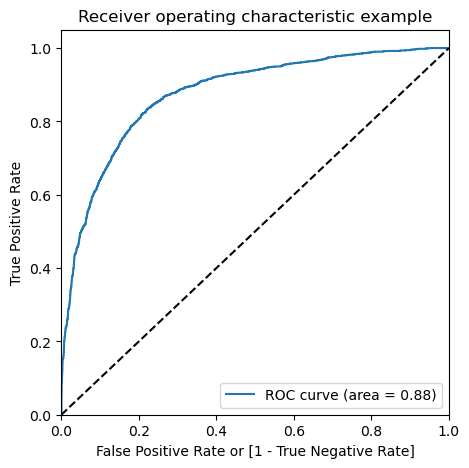

In [3461]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [3462]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.681717,1,1,1,1,1,1,1,1,0,0,0
1,0,0.016521,0,1,0,0,0,0,0,0,0,0,0
2,0,0.234378,0,1,1,1,0,0,0,0,0,0,0
3,0,0.163280,0,1,1,0,0,0,0,0,0,0,0
4,1,0.803764,1,1,1,1,1,1,1,1,1,1,0


In [3463]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381581,1.000000,0.000000
0.1,0.1,0.589816,0.963756,0.359085
0.2,0.2,0.734088,0.914745,0.622618
0.3,0.3,0.795380,0.843081,0.765947
0.4,0.4,0.807324,0.773476,0.828208
0.5,0.5,0.805123,0.687809,0.877510
0.6,0.6,0.796165,0.593904,0.920966
0.7,0.7,0.776678,0.492586,0.951970
0.8,0.8,0.747918,0.387974,0.970013
0.9,0.9,0.701713,0.235997,0.989072


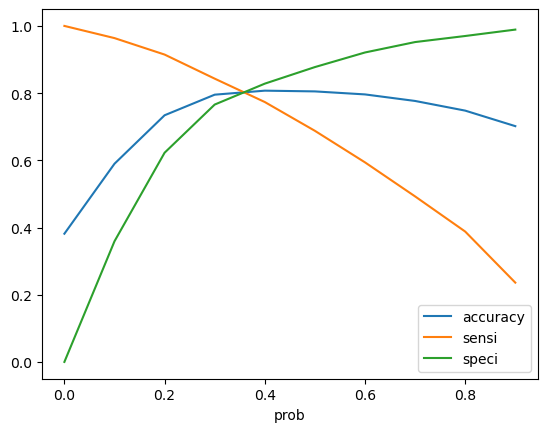

In [3464]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [3465]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.681717,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.016521,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.234378,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.163280,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.803764,1,1,1,1,1,1,1,1,1,1,0,1


In [3466]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8024516737388024

In [3467]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3142,  793],
       [ 464, 1964]], dtype=int64)

In [3468]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [3469]:
# Calculating the sensitivity
TP/(TP+FN)

0.8088962108731467

In [3470]:
# Calculating the specificity
TN/(TN+FP)

0.7984752223634053

In [3471]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20152477763659465


In [3472]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7123685165034458


In [3473]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8713255684969495


In [3474]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7123685165034458

In [3475]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8088962108731467

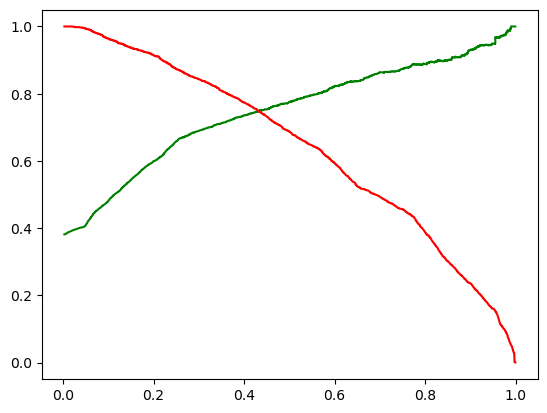

In [3476]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### Prediction on Test set

In [3477]:
len(X_test)

2727

In [3478]:
# selecting all columns from test data
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Mock Interview,Lead Number,Spent on Website,Do Not Email,Page Views Per Visit,TotalVisits,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Specialization_Industry Specializations,Specialization_Management Specializations,Occupation_Unemployed,Occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Notable Activity_Email Opened,Notable Activity_Modified,Notable Activity_Olark Chat Conversation,Notable Activity_Other_Notable_activity,Notable Activity_Page Visited on Website,Notable Activity_SMS Sent,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Google,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
6906,-0.685047,-0.861996,1.891958,-0.293294,-0.176707,0.265050,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1873,-0.685047,1.033585,-0.542475,-0.293294,-0.176707,-0.406066,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
771,-0.685047,1.502960,-0.790628,-0.293294,2.385935,1.271726,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4495,1.459755,-0.016994,-0.618551,-0.293294,0.848350,0.265050,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9061,1.459755,-1.528351,2.359282,-0.293294,-0.176707,-0.406066,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [3479]:
# scaling the test dataset
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[Features_final]
logm1 = sm.GLM(y_test,X_test_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2727
Model:                            GLM   Df Residuals:                     2709
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.1
Date:                Sun, 21 May 2023   Deviance:                       2406.1
Time:                        19:32:19   Pearson chi2:                 3.07e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3664
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Lead Number                                 0.2112      0.054      3.933      0.000       0.106       0.316
Spent on Website                            1.0919      0.061     17.883      0.000       0.972       1.212
Do Not Email                               -0.2094      0.078     -2.679      0.007      -0.363      -0.056
Page Views Per Visit                       -0.4353      0.085     -5.135      0.000      -0.601      -0.269
TotalVisits                                 0.1635      0.078      2.101      0.036       0.011       0.316
Lead Source_Google                         -0.1095      0.118     -0.930      0.352      -0.340       0.121
Lead Source_Olark Chat                      0.6880      0.180      3.826      0.000       0.336       1.040
Lead Source_Other Social Sites              1.0269      0.254      4.039      0.000       0.529       1.525
Lead Source_Reference                       3.4907      0.367      9.505      0.000       2.771       4.210
Occupation_Working Professional             2.4741      0.282      8.782      0.000       1.922       3.026
Notable Activity_Modified                  -1.1992      0.116    -10.342      0.000      -1.426      -0.972
Notable Activity_Other_Notable_activity    -0.3854      0.406     -0.949      0.343      -1.181       0.410
Notable Activity_SMS Sent                   0.4457      0.122      3.657      0.000       0.207       0.685
Last Activity_Email Bounced                -1.0951      0.486     -2.252      0.024      -2.048      -0.142
Last Activity_Email Opened                 -0.9180      0.103     -8.926      0.000      -1.120      -0.716
Last Activity_Google                        0.3775      0.662      0.570      0.568      -0.920       1.675
Last Activity_Olark Chat Conversation      -2.0397      0.276     -7.378      0.000      -2.582      -1.498
Last Activity_Page Visited on Website      -1.2749      0.248     -5.147      0.000      -1.760      -0.789
===========================================================================================================
"""

In [3480]:
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.92491815, 0.16647447, 0.08765441, 0.12227961, 0.55181733,
       0.3012021 , 0.09370535, 0.04083682, 0.10457919, 0.92682245])

In [3481]:
# Data frame with given convertion rate and probablity of predicted ones
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Prob
0,1,0.924918
1,0,0.166474
2,0,0.087654
3,0,0.122280
4,1,0.551817


In [3482]:
# Substituting 0 or 1 with the cut off as 0.5
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.924918,1
1,0,0.166474,0
2,0,0.087654,0
3,0,0.122280,0
4,1,0.551817,1


In [3483]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Converted','Conversion_Prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Converted,Conversion_Prob,Lead_Score
0,1,0.924918,92
1,0,0.166474,17
2,0,0.087654,9
3,0,0.122280,12
4,1,0.551817,55


In [3484]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,final_predicted
0,1,0.924918,92,1
1,0,0.166474,17,0
2,0,0.087654,9,0
3,0,0.122280,12,0
4,1,0.551817,55,1


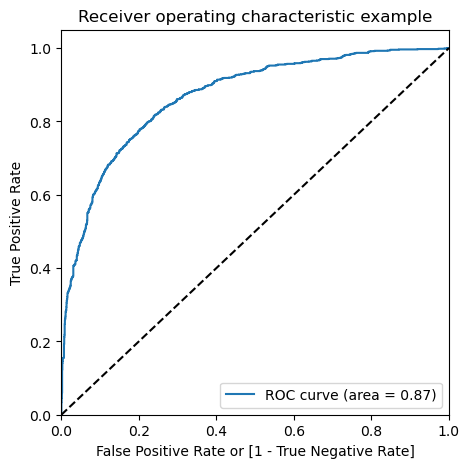

In [3485]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, y_test_pred_final.Conversion_Prob, drop_intermediate = False )

# Call the ROC function
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conversion_Prob)

In [3486]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion

array([[1257,  403],
       [ 194,  873]], dtype=int64)

In [3487]:
# Check the overall accuracy
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.7810781078107811

In [3488]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [3489]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7123685165034458

In [3490]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8088962108731467

In [3491]:
precision_score(y_test_pred_final.Converted , y_test_pred_final.final_predicted)

0.6841692789968652

In [3492]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8181818181818182

In [3493]:
# Calculating the sensitivity
TP/(TP+FN)

0.8088962108731467

In [3494]:
# Calculating the specificity
TN/(TN+FP)

0.7984752223634053

In [3495]:
print(len(Features_final))

18


###### 
Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 80.12


Test Data: 
Accuracy : 79.13